In [67]:
import networkx as nx

<h3>I] Create a graph from the
karate.gml file. Display all the basic information about
the network.

In [68]:
G = nx.read_gml('karate.gml')

In [69]:
total = sum(deg for node,deg in G.degree())
avg_deg = total/G.number_of_nodes()

In [70]:
print(f"Number of nodes in the graph: {G.number_of_nodes()}\n"
        f"Number of edges in the graph: {G.number_of_edges()}\n"
        f"Is graph connected: {nx.is_connected(G)}\n"
        f"Diameter: {nx.diameter(G)}\n"
        f"Average Degree: {avg_deg}")

Number of nodes in the graph: 34
Number of edges in the graph: 78
Is graph connected: True
Diameter: 5
Average Degree: 4.588235294117647


In [71]:
G.nodes

NodeView(('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34'))

In [72]:
G.edges

EdgeView([('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('1', '6'), ('1', '7'), ('1', '8'), ('1', '9'), ('1', '11'), ('1', '12'), ('1', '13'), ('1', '14'), ('1', '18'), ('1', '20'), ('1', '22'), ('1', '32'), ('2', '3'), ('2', '4'), ('2', '8'), ('2', '14'), ('2', '18'), ('2', '20'), ('2', '22'), ('2', '31'), ('3', '4'), ('3', '8'), ('3', '9'), ('3', '10'), ('3', '14'), ('3', '28'), ('3', '29'), ('3', '33'), ('4', '8'), ('4', '13'), ('4', '14'), ('5', '7'), ('5', '11'), ('6', '7'), ('6', '11'), ('6', '17'), ('7', '17'), ('9', '31'), ('9', '33'), ('9', '34'), ('10', '34'), ('14', '34'), ('15', '33'), ('15', '34'), ('16', '33'), ('16', '34'), ('19', '33'), ('19', '34'), ('20', '34'), ('21', '33'), ('21', '34'), ('23', '33'), ('23', '34'), ('24', '26'), ('24', '28'), ('24', '30'), ('24', '33'), ('24', '34'), ('25', '26'), ('25', '28'), ('25', '32'), ('26', '32'), ('27', '30'), ('27', '34'), ('28', '34'), ('29', '32'), ('29', '34'), ('30', '33'), ('30', '34'), ('31', '33'), ('31', '34'), (

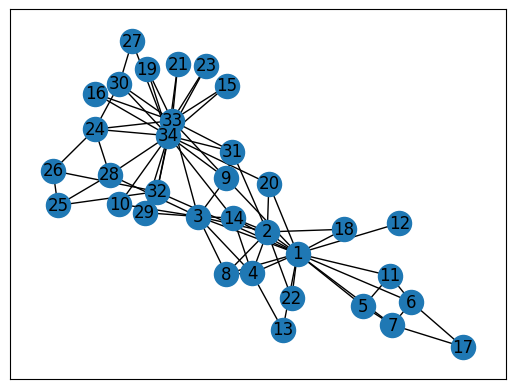

In [73]:
nx.draw_networkx(G)

<h3>II] Store all the metadata of the actors in the network.

In [74]:
metadata = G.nodes(data=True)
metadata

NodeDataView({'1': {}, '2': {}, '3': {}, '4': {}, '5': {}, '6': {}, '7': {}, '8': {}, '9': {}, '10': {}, '11': {}, '12': {}, '13': {}, '14': {}, '15': {}, '16': {}, '17': {}, '18': {}, '19': {}, '20': {}, '21': {}, '22': {}, '23': {}, '24': {}, '25': {}, '26': {}, '27': {}, '28': {}, '29': {}, '30': {}, '31': {}, '32': {}, '33': {}, '34': {}})

<h3>III] Calculate all types of centrality (degree, betweenness, closeness, eigenvector,
pagerank centrality). Analyse the nodes based on the centrality values. Write a
note on this.

In [75]:
def get_top_nodes(cdict, num=5):
    top_nodes = {}
    for i in range(num):
        top_nodes = dict(
        sorted(cdict.items(), key=lambda x: x[1],
        reverse=True)[:num]
        )
    return top_nodes

<h4>1.Degree Centrality

In [76]:
degree_centrality = nx.degree_centrality(G)
get_top_nodes(degree_centrality)

{'34': 0.5151515151515151,
 '1': 0.48484848484848486,
 '33': 0.36363636363636365,
 '3': 0.30303030303030304,
 '2': 0.2727272727272727}

We can see nodes 34, 1, 33, 3 and 2 having the highest degree centrality measures.
We could say that these nodes are the most prominent and influential in the network.

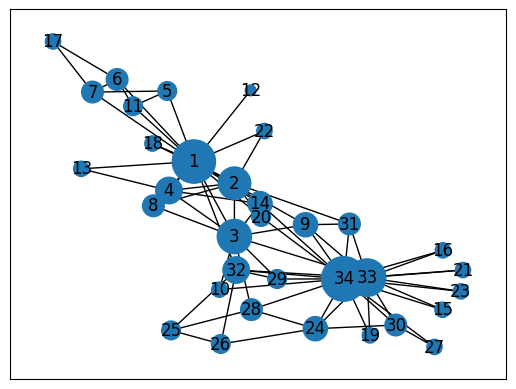

In [77]:
nx.draw_networkx(G, node_size=[2000 * v for v in degree_centrality.values()])

<h4>2.Betweenness Centrality

In [78]:
betweenness_centrality = nx.betweenness_centrality(G)
get_top_nodes(betweenness_centrality)

{'1': 0.43763528138528146,
 '34': 0.30407497594997596,
 '33': 0.145247113997114,
 '3': 0.14365680615680618,
 '32': 0.13827561327561325}

We can see nodes 1, 34, 33, 3 and 32 having the highest betweenness centrality measures.
These actors have major influence and control over the information flow in the network. 
They can give good information sharing or could even act as gatekeepers.

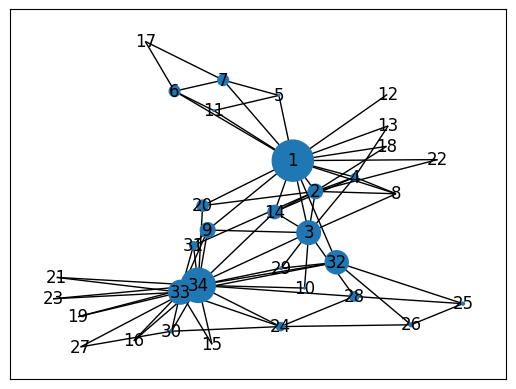

In [79]:
nx.draw_networkx(G, node_size=[2000 * v for v in betweenness_centrality.values()])

<h4>3.Closeness Centrality

In [80]:
closeness_centrality = nx.closeness_centrality(G)
get_top_nodes(closeness_centrality)

{'1': 0.5689655172413793,
 '3': 0.559322033898305,
 '34': 0.55,
 '32': 0.5409836065573771,
 '9': 0.515625}

We can see nodes 1, 3, 34, 32 and 9 having the highest closeness centrality measures.
These nodes are positioned close to many other nodes from the network. These type of nodes usually are able to spread and receive information easily as they have very short distance from other nodes.

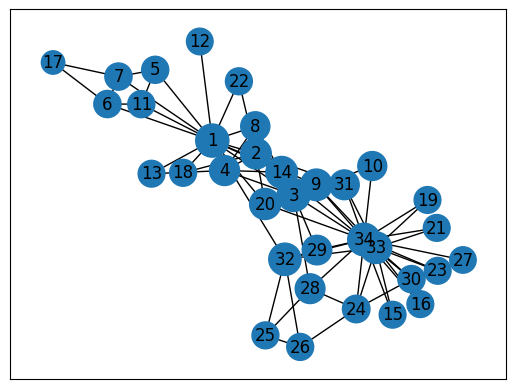

In [81]:
nx.draw_networkx(G, node_size=[1000 * v for v in closeness_centrality.values()])

From the graph we can say that the closeness centrality measure of all the nodes seem to be very close.

<h3>4.EigenVector Centrality

In [82]:
eigenvector_centrality = nx.eigenvector_centrality(G)
get_top_nodes(eigenvector_centrality)

{'34': 0.373371213013235,
 '1': 0.3554834941851943,
 '3': 0.3171893899684447,
 '33': 0.30865104773369595,
 '2': 0.2659538704545025}

We can see nodes 34, 1, 3, 33 and 2 having the highest eigenvector centrality measures.
These nodes not only are influential themselves but are connected to other influential nodes.

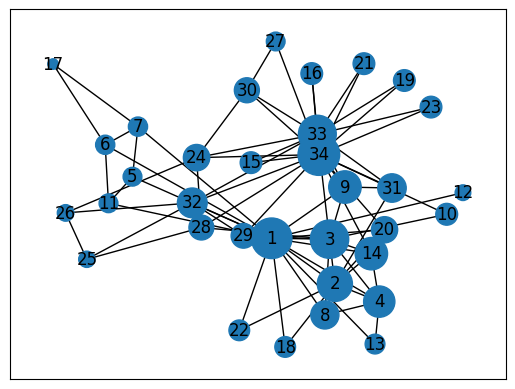

In [83]:
nx.draw_networkx(G, node_size=[2400 * v for v in eigenvector_centrality.values()])

<h3>5.Pagerank Centrality

In [84]:
pagerank_centrality = nx.pagerank(G)
get_top_nodes(pagerank_centrality)

{'34': 0.1009179167487121,
 '1': 0.09700181758983706,
 '33': 0.07169213006588289,
 '3': 0.05707842304763674,
 '2': 0.05287839103742701}

We can see nodes 34, 1, 33, 3 and 2 having the highest pagerank centrality measures.
This is similar to eigenvector centrality, these nodes are influential and are also having links to other influential nodes in the network.

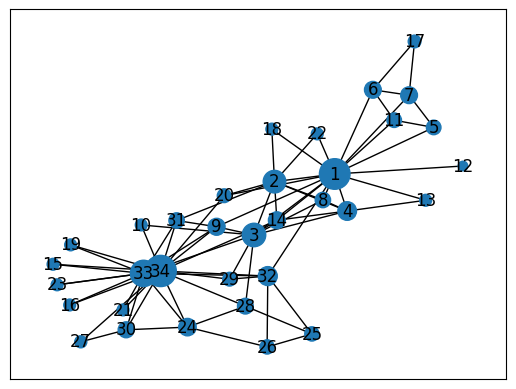

In [85]:
nx.draw_networkx(G, node_size=[5000 * v for v in pagerank_centrality.values()])

Based on all the above centrality measures we can say:
1. Nodes 1 and 34 seem to be the most important. In this dataset, they are the main leaders of the two factions the karate club is split into.
2. These two nodes are top in all the centrality measures so they are very influential and have significant sway over other actors in the network.
3. Other nodes like 33, 32, 2, 3 and 9 appear a few times on some of the centrality measures. So even they a bit more influential than the other nodes in the network.

<h3>IV] Find the possible k-components of the network and the clustering coefficient.

<h4>k_componenets

In [86]:
components = nx.k_components(G)
print(components)


{4: [{'14', '33', '4', '34', '1', '3', '2', '9', '31', '8'}], 3: [{'14', '4', '26', '32', '29', '30', '20', '24', '34', '33', '1', '3', '2', '9', '31', '25', '28', '8'}, {'5', '1', '11', '7', '6'}], 2: [{'14', '4', '26', '15', '32', '29', '19', '20', '30', '22', '24', '18', '34', '33', '1', '27', '16', '13', '3', '2', '9', '23', '21', '10', '31', '25', '28', '8'}, {'5', '1', '11', '7', '17', '6'}], 1: [{'5', '26', '32', '29', '19', '6', '12', '22', '18', '34', '24', '27', '16', '13', '2', '9', '23', '21', '31', '25', '8', '14', '4', '17', '15', '20', '30', '33', '1', '11', '3', '10', '28', '7'}]}


<h4>Clustering Coefficient

In [87]:
ccoeff = nx.clustering(G)
print(ccoeff)

{'1': 0.15, '2': 0.3333333333333333, '3': 0.24444444444444444, '4': 0.6666666666666666, '5': 0.6666666666666666, '6': 0.5, '7': 0.5, '8': 1.0, '9': 0.5, '10': 0, '11': 0.6666666666666666, '12': 0, '13': 1.0, '14': 0.6, '15': 1.0, '16': 1.0, '17': 1.0, '18': 1.0, '19': 1.0, '20': 0.3333333333333333, '21': 1.0, '22': 1.0, '23': 1.0, '24': 0.4, '25': 0.3333333333333333, '26': 0.3333333333333333, '27': 1.0, '28': 0.16666666666666666, '29': 0.3333333333333333, '30': 0.6666666666666666, '31': 0.5, '32': 0.2, '33': 0.19696969696969696, '34': 0.11029411764705882}


In [88]:
avg_ccoeff = nx.average_clustering(G)
print(avg_ccoeff)

0.5706384782076823


<h3>V] Find out the communities using Girvan-Newman algorithm and Louvain
method

<h4>1.Girvan Newman Communitites

In [89]:
from networkx.algorithms import community
comp = community.girvan_newman(G)
communities = tuple(sorted(c) for c in next(comp))

In [90]:
len(communities)

2

In [91]:
com1 = G.subgraph(communities[0])
com2 = G.subgraph(communities[1])

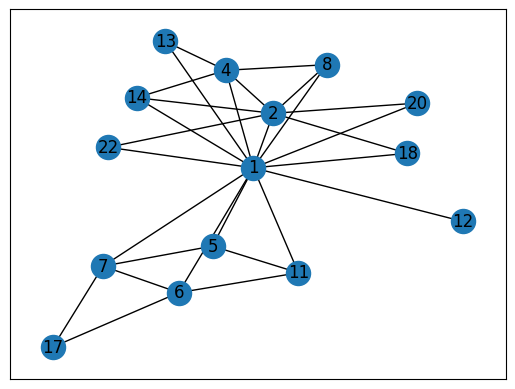

In [92]:
nx.draw_networkx(com1)

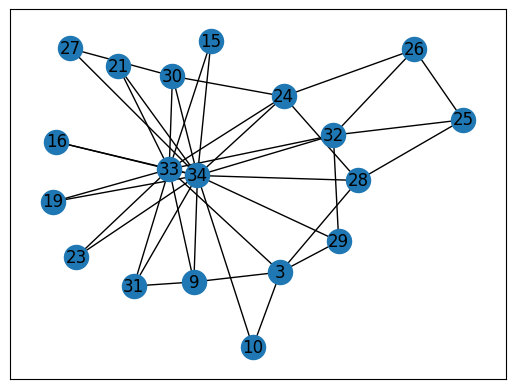

In [93]:
nx.draw_networkx(com2)

<h4>2.Louvian Communities

In [94]:
louvian_comms = community.louvain_communities(G)
len(louvian_comms)


4

In [95]:
lcom1 = G.subgraph(louvian_comms[0])
lcom2 = G.subgraph(louvian_comms[1])
lcom3 = G.subgraph(louvian_comms[2])
lcom4 = G.subgraph(louvian_comms[3])

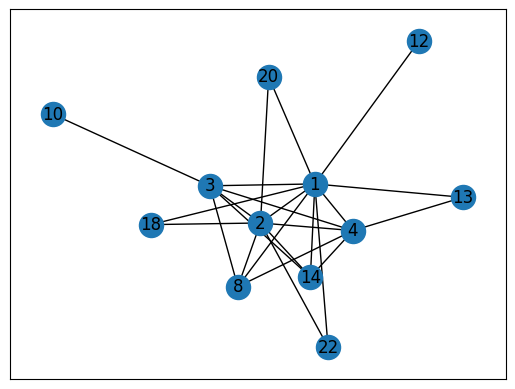

In [96]:
nx.draw_networkx(lcom1)

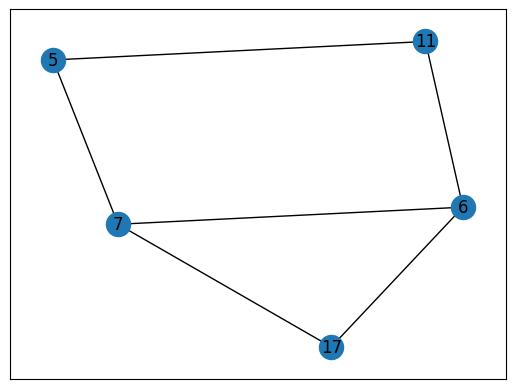

In [97]:
nx.draw_networkx(lcom2)

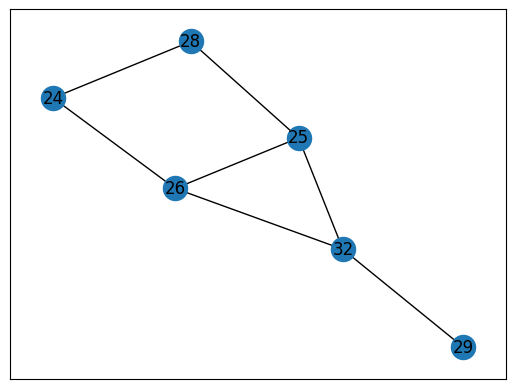

In [98]:
nx.draw_networkx(lcom3)

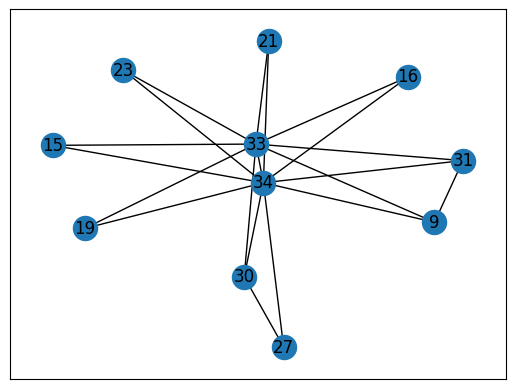

In [99]:
nx.draw_networkx(lcom4)